### Imports

In [78]:
import matplotlib.pyplot as plt
import networkx as nx
import heapq
import random
import time

### Structures

In [ ]:
class Edge:
    def __init__(self, v1, v2, weight):
        self.v1 = v1
        self.v2 = v2
        self.weight = weight

    def __repr__(self):
        return f"{self.v1} --{self.weight}--> {self.v2}"

In [ ]:
class Graph:
    def __init__(self):
        self.edges = []
        # self.nodes = set()

    def add_edge(self, v1, v2, weight):
        if not self.find_edge(v1, v2):
            self.edges.append(Edge(v1, v2, weight))
            # self.nodes.add(v1)
            # self.nodes.add(v2)

    def remove_edge(self, v1, v2):
        self.edges = [edge for edge in self.edges if not ((edge.v1 == v1 and edge.v2 == v2) or (edge.v1 == v2 and edge.v2 == v1))]

    def remove_vertex(self, v):
        self.edges = [edge for edge in self.edges if edge.v1 != v and edge.v2 != v]

    def find_edge(self, v1, v2):
        return any((edge.v1 == v1 and edge.v2 == v2) or (edge.v1 == v2 and edge.v2 == v1) for edge in self.edges)

    def print_graph(self):
        print("Edges in the Graph:")
        for edge in self.edges:
            print(edge)


In [ ]:
class UnionFind:
    def __init__(self, size):
        self.parent = list(range(size))
        self.rank = [0] * size

    def find(self, p):
        if self.parent[p] != p:
            self.parent[p] = self.find(self.parent[p])
        return self.parent[p]

    def union(self, p, q):
        rootP = self.find(p)
        rootQ = self.find(q)
        if rootP != rootQ:
            if self.rank[rootP] > self.rank[rootQ]:
                self.parent[rootQ] = rootP
            elif self.rank[rootP] < self.rank[rootQ]:
                self.parent[rootP] = rootQ
            else:
                self.parent[rootQ] = rootP
                self.rank[rootP] += 1


### Algorathims

In [ ]:
def kruskal(graph):
    mst = []
    edges = sorted(graph.edges, key=lambda edge: edge.weight)
    uf = UnionFind(max(max(edge.v1, edge.v2) for edge in edges) + 1)
    
    for edge in edges:
        if uf.find(edge.v1) != uf.find(edge.v2):
            uf.union(edge.v1, edge.v2)
            mst.append(edge)
    
    return mst

def visualize_graph(graph):
    G = nx.Graph()
    for edge in graph.edges:
        G.add_edge(edge.v1, edge.v2, weight=edge.weight)
    
    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=1500, font_size=10, font_weight='bold')
    labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
    plt.title("Graph Visualization")
    return plt

def visualize_mst(mst):
    G = nx.Graph()
    for edge in mst:
        G.add_edge(edge.v1, edge.v2, weight=edge.weight)
    
    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True, node_color='lightgreen', node_size=1500, font_size=10, font_weight='bold')
    labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
    plt.title("Minimum Spanning Tree Visualization")
    return plt


In [ ]:
def prim_mst(graph):
    mst = []
    visited = set()
    start_node = 0  # Start from node 0, you can choose any starting node
    
    # Create a priority queue to store the edges
    pq = []
    heapq.heappush(pq, (0, start_node, None))  # (weight, node, parent)

    while pq:
        weight, node, parent = heapq.heappop(pq)
        if node not in visited:
            visited.add(node)
            if parent is not None:
                mst.append((parent, node, weight))
            for neighbor, weight in graph[node]:
                if neighbor not in visited:
                    heapq.heappush(pq, (weight, neighbor, node))
    
    return mst

def create_adjacency_list(graph):
    adjacency_list = [[] for _ in range(50)]
    for edge in graph.edges:
        adjacency_list[edge.v1].append((edge.v2, edge.weight))
        adjacency_list[edge.v2].append((edge.v1, edge.weight))
    return adjacency_list
def visualize_mst_prim(graph, mst_prim):
    G = nx.Graph()
    
    # Add edges from original graph
    for edge in graph.edges:
        G.add_edge(edge.v1, edge.v2, weight=edge.weight)
    
    # Add edges from MST obtained using Prim's algorithm
    for edge in mst_prim:
        G.add_edge(edge[0], edge[1], weight=edge[2])  # Do not specify color here
    
    pos = nx.spring_layout(G)
    
    # Extract edge colors
    edge_colors = ['red' if (u, v) in mst_prim or (v, u) in mst_prim else 'seagreen' for u, v in G.edges()]
    
    nx.draw(G, pos, with_labels=True, node_color='red', node_size=1500, font_size=10, font_weight='bold', edge_color=edge_colors)
    labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
    plt.title("Minimum Spanning Tree Visualization (Prim's Algorithm)")
    plt.show()



In [ ]:


def visualize_mst_title(graph, mst, title):
    G = nx.Graph()
    G.add_weighted_edges_from(graph)
    
    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=1500, font_size=10, font_weight='bold')
    nx.draw_networkx_edges(G, pos, edgelist=mst, edge_color='red', width=2)
    labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
    plt.title(title)
    plt.show()

In [ ]:
import random

# Create a Graph with 50 nodes
graph = Graph()
num_nodes = 50

# Add random edges with random weights
for i in range(num_nodes):
    for j in range(i + 1, num_nodes):
        if random.random() < 0.4:  # Adjust the probability to control the sparsity of the graph
            weight = random.randint(1, 20)  # Random weight between 1 and 20
            graph.add_edge(i, j, weight)

graph.print_graph()


In [ ]:
graph.print_graph()
plt_graph = visualize_graph(graph)
plt_graph.show()

In [ ]:
mst = kruskal(graph)
plt_mst = visualize_mst(mst)
plt_mst.show()


In [ ]:
adjacency_list = create_adjacency_list(graph)
mst_prim = prim_mst(adjacency_list)
visualize_mst_prim(graph, mst_prim)

### Reverse delete

In [69]:
def reverse_delete_mst(graph):
    sorted_edges = sorted(graph.edges, key=lambda edge: edge.weight, reverse=True)
    mst = []
    uf = UnionFind(len(graph.edges))
    
    for edge in sorted_edges:
        uf.union(edge.v1, edge.v2)
        if len(set(uf.parent)) > 1:
            uf.union(edge.v1, edge.v2)
            mst.append(edge)
    return mst

def visualize_mst_reverse_delete(graph, mst_reverse_delete):
    G = nx.Graph()
    for edge in graph.edges:
        G.add_edge(edge.v1, edge.v2, weight=edge.weight)
    
    for edge in mst_reverse_delete:
        G.add_edge(edge.v1, edge.v2, weight=edge.weight)
    
    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=1500, font_size=10, font_weight='bold')
    labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
    plt.title("Minimum Spanning Tree Visualization (Reverse-Delete Algorithm)")
    plt.show()

Edges in the Graph:
0 --5--> 1
0 --15--> 5
0 --18--> 9
0 --20--> 22
0 --2--> 26
0 --17--> 27
0 --15--> 30
0 --13--> 37
0 --5--> 38
0 --16--> 41
0 --20--> 43
1 --20--> 3
1 --16--> 4
1 --12--> 5
1 --12--> 7
1 --12--> 9
1 --12--> 10
1 --19--> 12
1 --5--> 13
1 --9--> 14
1 --9--> 17
1 --7--> 19
1 --6--> 21
1 --3--> 22
1 --1--> 25
1 --8--> 28
1 --20--> 29
1 --12--> 31
1 --12--> 39
1 --11--> 43
1 --2--> 44
1 --7--> 47
1 --15--> 49
2 --14--> 3
2 --10--> 6
2 --8--> 7
2 --15--> 10
2 --8--> 15
2 --14--> 17
2 --4--> 19
2 --2--> 27
2 --8--> 34
2 --20--> 37
2 --12--> 38
2 --6--> 40
2 --4--> 41
2 --2--> 44
2 --14--> 48
2 --15--> 49
3 --2--> 4
3 --9--> 7
3 --1--> 9
3 --4--> 10
3 --13--> 16
3 --6--> 23
3 --4--> 25
3 --19--> 27
3 --8--> 32
3 --7--> 35
3 --14--> 36
3 --11--> 39
3 --6--> 40
3 --12--> 41
3 --19--> 43
3 --12--> 44
3 --2--> 45
3 --9--> 48
4 --18--> 5
4 --20--> 6
4 --1--> 10
4 --4--> 11
4 --2--> 15
4 --4--> 23
4 --8--> 25
4 --12--> 28
4 --18--> 31
4 --2--> 32
4 --2--> 35
4 --5--> 40
4 --17-->

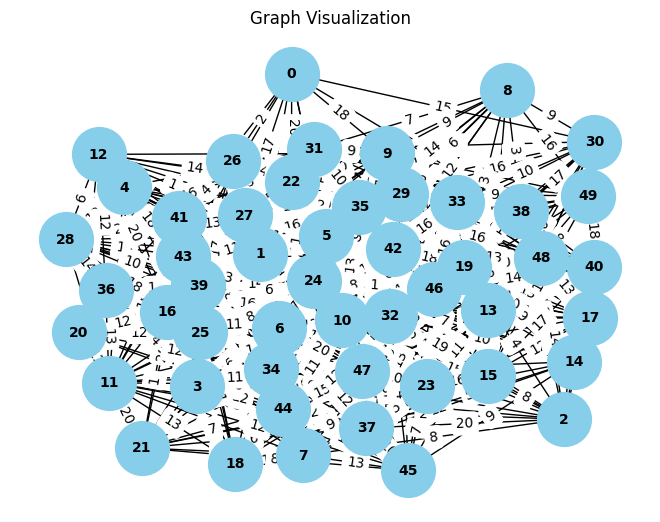

In [70]:
graph = Graph()
num_nodes = 50

for i in range(num_nodes):
    for j in range(i + 1, num_nodes):
        if random.random() < 0.4:
            weight = random.randint(1, 20)
            graph.add_edge(i, j, weight)

graph.print_graph()
plt_graph = visualize_graph(graph)
plt_graph.show()

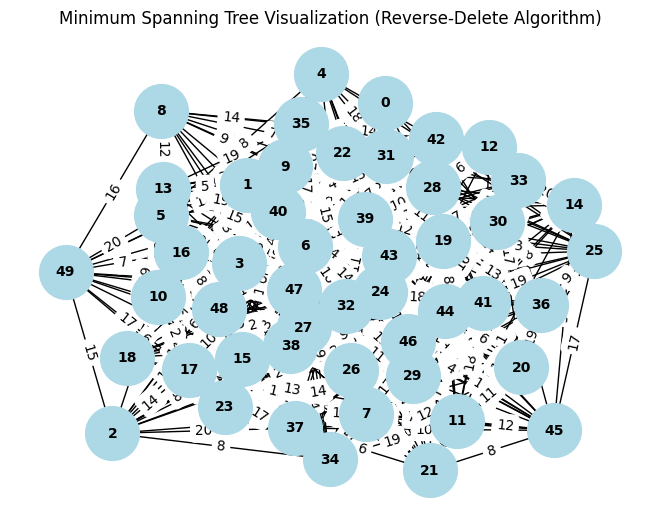

In [71]:

mst_reverse_delete = reverse_delete_mst(graph)
visualize_mst_reverse_delete(graph, mst_reverse_delete)

### Borůvka's Algorithm

In [74]:
def boruvka_mst(graph):
    mst = []
    num_nodes = len(graph)

    # Initialize each node to its own component
    components = [[i] for i in range(num_nodes)]

    while len(components) > 1:
        cheapest = [-1] * num_nodes  # Array to store the cheapest edge for each component
        for i, component in enumerate(components):
            for node in component:
                for neighbor, weight in graph[node]:
                    neighbor_component = find_component(components, neighbor)
                    if neighbor_component != i:  # Check if neighbor belongs to a different component
                        if cheapest[i] == -1 or weight < cheapest[i][1]:  # Update cheapest edge for component
                            cheapest[i] = (neighbor, weight, i, neighbor_component)
        
        for i, edge in enumerate(cheapest):
            if edge != -1:
                mst.append((edge[0], components[edge[2]][0], edge[1]))  # Add edge to MST
                components[edge[2]].extend(components[edge[3]])  # Merge components

        components = [component for component in components if len(component) > 1]

    return mst

def find_component(components, node):
    for i, component in enumerate(components):
        if node in component:
            return i
            
def visualize_mst_boruvka(graph, mst_boruvka):
    G = nx.Graph()
    
    # Add edges from original graph
    for node, neighbors in enumerate(graph):
        for neighbor, weight in neighbors:
            G.add_edge(node, neighbor, weight=weight)
    
    # Add edges from MST obtained using Borůvka's algorithm
    for edge in mst_boruvka:
        G.add_edge(edge[0], edge[1], weight=edge[2])
    
    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=1500, font_size=10, font_weight='bold')
    labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
    plt.title("Minimum Spanning Tree Visualization (Borůvka's Algorithm)")
    plt.show()


In [ ]:
adjacency_list = create_adjacency_list(graph)
mst_boruvka = boruvka_mst(adjacency_list)
visualize_mst_boruvka(adjacency_list, mst_boruvka)


### Chazelle Algorithms

In [76]:
def chazelle_mst(graph):
    mst = []
    # Randomly permute the edges of the graph
    edges = random.sample(graph.edges, len(graph.edges))
    uf = UnionFind(max(max(edge.v1, edge.v2) for edge in edges) + 1)
    
    for edge in edges:
        if uf.find(edge.v1) != uf.find(edge.v2):
            uf.union(edge.v1, edge.v2)
            mst.append(edge)
    
    return mst

<module 'matplotlib.pyplot' from 'd:\\black hat hacking\\python\\001 path of python\\Lib\\site-packages\\matplotlib\\pyplot.py'>

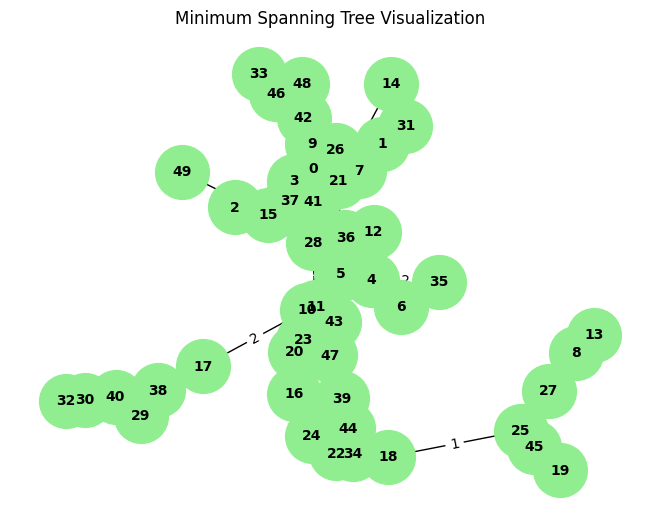

In [77]:
mst_chazelle = chazelle_mst(graph)
visualize_mst(mst_chazelle)

### Final Arc

In [79]:
def measure_time(edges, mst_algo):
    times = []
    for num_edges in edges:
        graph = Graph()
        for i in range(num_edges):
            for j in range(i + 1, num_edges):
                if random.random() < 0.4:  # Adjust the probability to control the sparsity of the graph
                    weight = random.randint(1, 20)  # Random weight between 1 and 20
                    graph.add_edge(i, j, weight)
        
        start_time = time.time()
        if mst_algo == 'kruskal':
            kruskal(graph)
        elif mst_algo == 'prim':
            adjacency_list = create_adjacency_list(graph)
            prim_mst(adjacency_list)
        elif mst_algo == 'chazelle':
            chazelle_mst(graph)
        elif mst_algo == 'Reverse_delete':
            reverse_delete_mst(graph)
        elif mst_algo == 'Borůvka' :
            boruvka_mst(graph)
        else:
            raise ValueError("Invalid MST algorithm specified")
        
        end_time = time.time()
        elapsed_time = end_time - start_time
        times.append(elapsed_time)
    
    return times

In [82]:
edges = [10, 100, 1000, 10000, 100000, 1000000 , 10000000]
mst_algos = ['kruskal', 'prim', 'chazelle','Reverse_delete','Borůvka']

In [83]:
plt.figure(figsize=(10, 6))
for mst_algo in mst_algos:
    times = measure_time(edges, mst_algo)
    plt.plot(edges, times, label=mst_algo)

In [ ]:
plt.xlabel('Number of Edges')
plt.ylabel('Time (seconds)')
plt.title('Time vs Number of Edges for Different MST Algorithms')
plt.legend()
plt.grid(True)
plt.show()